In [76]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import netCDF4 as nc
import os
import matplotlib.pyplot as plt

In [147]:
sst_traj_one = xr.open_dataset('trajectories_tas/tas_traj0000.nc')

In [148]:
sst_df = sst_traj_one.to_dataframe()
print(sst_df['time_bnds'].unique())
for col in sst_df.columns:
    print(col)
sst_df.head()

[18920201. 18920230. 18920301. 18920330. 18920401. 18920430. 18920501.
 18920530. 18920601. 18920630. 18920701. 18920730. 18920801. 18920830.
 18920901. 18920930. 18921001. 18921030. 18921101. 18921130. 18921201.
 18921230. 18930101. 18930130. 34050201. 34050230. 34050301. 34050330.
 34050401. 34050430. 34050501. 34050530. 34050601. 34050630. 34050701.
 34050730. 34050801. 34050830. 34050901. 34050930. 34051001. 34051030.
 34051101. 34051130. 34051201. 34051230. 34060101. 34060130. 35050201.
 35050230. 35050301. 35050330. 35050401. 35050430. 35050501. 35050530.
 35050601. 35050630. 35050701. 35050730. 35050801. 35050830. 35050901.
 35050930. 35051001. 35051030. 35051101. 35051130. 35051201. 35051230.
 35060101. 35060130. 36050201. 36050230. 36050301. 36050330. 36050401.
 36050430. 36050501. 36050530. 36050601. 36050630. 36050701. 36050730.
 36050801. 36050830. 36050901. 36050930. 36051001. 36051030. 36051101.
 36051130. 36051201. 36051230. 36060101. 36060130. 37050201. 37050230.
 37050

time_bnds         tas
time       bnds lon lat                              
18920215.5 0    0.0 85.760587  18920201.0  218.413315
                    80.268779  18920201.0  230.251572
                    74.744540  18920201.0  246.862320
                    69.212976  18920201.0  261.027374
                    63.678636  18920201.0  265.914581

In [149]:
sst_df = sst_df.reset_index()

In [150]:
sst_df.head()
print(len(sst_df))
print(sst_df['year'].unique())

442368


KeyError: 'year'

In [183]:
#get just the year
#make a list of unique time_bnds
def make_bounds(df):

    df['year'] = df['time'].astype(str).str[:4]
    time_bnds_list = df['year'].unique()
    print(len(time_bnds_list))
    bounds=[]
    #print length of list
    for time in time_bnds_list:
        bound = df.loc[df['year']==time]
        bounds.append(len(bound))
    #make a new column with a counter, changing at each end of list
    print(len(bounds))
    values=[]
    #get length of bounds
    print(bounds[0],bounds[1])
    bound_length = bounds[0] + bounds[1]
    end_term = int(len(bounds)/2+1)
    for i in range(1, end_term):
        values += [i] * bound_length
    return values

In [151]:
sst_df['Year Counter'] = values

In [152]:
weights = np.cos(np.deg2rad(sst_df['lat']))
sst_df['weighted_tas'] = sst_df['tas'] * weights

<Axes: xlabel='Year Counter', ylabel='weighted_tas'>

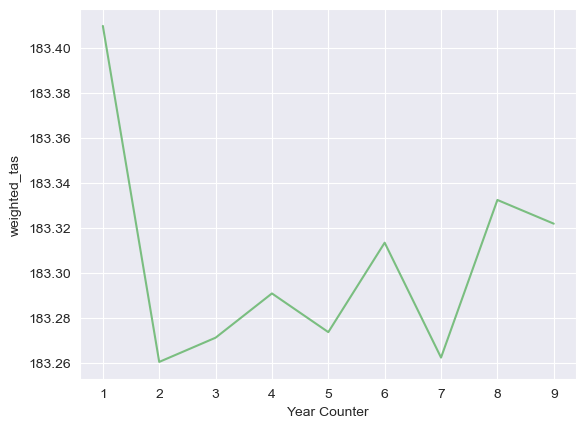

In [153]:
sns.lineplot(data=sst_df,x='Year Counter',y='weighted_tas',errorbar=None)

tas_traj0006.nc
20
20
11 1
tas_traj0002.nc
20
20
11 1
tas_traj0003.nc
20
20
11 1
tas_traj0007.nc
20
20
11 1
tas_traj0008.nc
20
20
11 1
tas_traj0009.nc
20
20
11 1
tas_traj0000.nc
18
18
11 1
tas_traj0004.nc
20
20
11 1
tas_traj0005.nc
20
20
11 1
tas_traj0001.nc
18
18
11 1


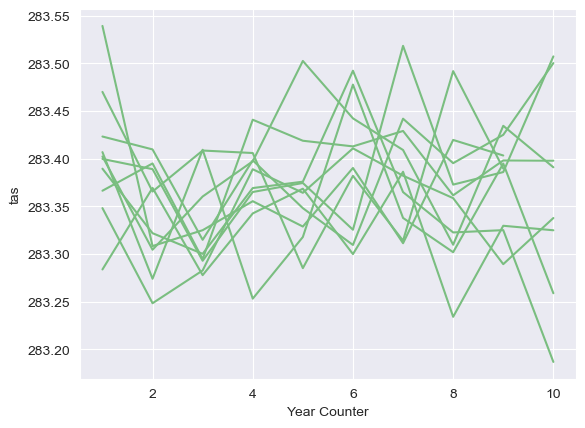

,time,tas,year,Year Counter,Trajectory ID
0,18930215.5,281.236395,1893,1,9
1,18930315.5,281.755636,1893,1,9
2,18930415.5,282.929689,1893,1,9
3,18930515.5,284.320867,1893,1,9
4,18930615.5,285.466201,1893,1,9


In [186]:
#ensemble spread and std dev
folder_path='trajectories_tas/'
plt.figure()
traj_counter=0
ensemble_list=[]
for file in os.listdir(folder_path):
    if file.endswith(".nc"):
        print(file)
        sst_annual=xr.open_dataset(os.path.join(folder_path, file))
        weights = np.cos(np.deg2rad(sst_annual['lat']))
        
        tas_global = (
            sst_annual['tas']
            .weighted(weights)
            .mean(dim=('lat', 'lon'))
        )
        tas_weighted=tas_global.to_dataframe()
        reset=tas_weighted.reset_index()
        reset['Year Counter'] = make_bounds(reset)
        #weights = np.cos(np.deg2rad(reset['lat']))
        #reset['weighted_tas'] = reset['tas'] * weights
        sns.lineplot(data=reset,x='Year Counter',y='tas',errorbar=None)
        reset['Trajectory ID']=traj_counter
        traj_counter+=1
        ensemble_list.append(reset)
plt.show()
plt.close()
reset.head()

In [190]:
ensemble['tas'].dtype

dtype('float64')

Year Counter
1     283.402945
2     283.338573
3     283.326644
4     283.371669
5     283.368441
6     283.394322
7     283.389508
8     283.356819
9     283.377559
10    283.363093
Name: tas, dtype: float64


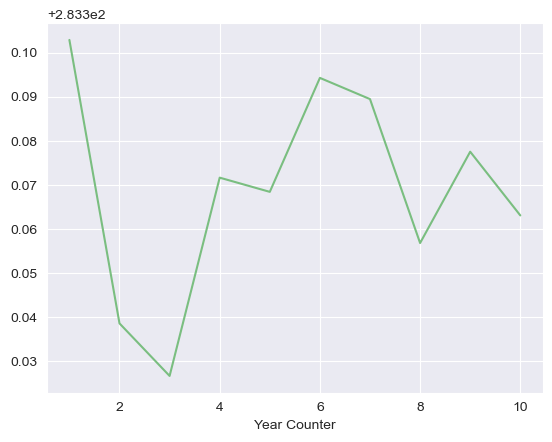

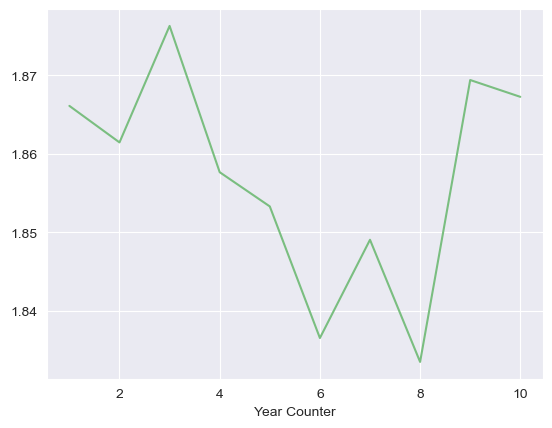

,time,tas,year,Year Counter,Trajectory ID
0,16160215.5,280.848658,1616,1,0
1,16160315.5,281.529713,1616,1,0
2,16160415.5,282.754529,1616,1,0
3,16160515.5,284.477558,1616,1,0
4,16160615.5,285.603778,1616,1,0


In [191]:
#concat dfs
ensemble=pd.concat(ensemble_list,ignore_index=True)
#groupby to get ensemble mean
ensemble_mean=ensemble.groupby('Year Counter')['tas'].mean()
print(ensemble_mean)
#groupby to get ensemble std deviation
ensemble_std=ensemble.groupby('Year Counter')['tas'].std()
#plot
plt.figure()
ensemble_mean.plot()
plt.show()
plt.close()

plt.figure()
ensemble_std.plot()
plt.show()
plt.close()
ensemble.head()